In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fusion genes from pizzly

In [35]:
cancer_fusion = pd.read_csv('all_data/cancer_fusion.txt', sep = '\t')
cancer_fusion = cancer_fusion.iloc[:,[0, 2, 4, 5]]
cancer_fusion[(cancer_fusion.paircount != 0) & (cancer_fusion.splitcount !=0)].sort_values(by='paircount', ascending=False)

,geneA.name,geneB.name,paircount,splitcount
43,BSG,NFIX,19,3
100,NPEPPS,TBC1D3D,6,1
107,NPEPPS,TBC1D3K,6,1
106,NPEPPS,TBC1D3L,6,1
105,NPEPPS,TBC1D3C,6,1
104,NPEPPS,TBC1D3H,6,1
103,NPEPPS,TBC1D3E,6,1
101,NPEPPS,TBC1D3,6,1
102,NPEPPS,TBC1D3G,6,1
99,NPEPPS,TBC1D3I,6,1


In [34]:
cancer_fusion = pd.read_csv('all_data/normal_fusion.txt', sep = '\t')
cancer_fusion = cancer_fusion.iloc[:,[0, 2, 4, 5]]
cancer_fusion[(cancer_fusion.paircount != 0) & (cancer_fusion.splitcount !=0)].sort_values(by='paircount', ascending=False)

,geneA.name,geneB.name,paircount,splitcount
24,HLA-C,HLA-B,87,9
47,CCDC32,CBX3,2,1
27,NPEPPS,TBC1D3D,1,3
28,NPEPPS,TBC1D3I,1,3
29,NPEPPS,TBC1D3L,1,3
30,NPEPPS,TBC1D3K,1,3
31,NPEPPS,TBC1D3,1,3
32,NPEPPS,TBC1D3G,1,3
33,NPEPPS,TBC1D3E,1,3
34,NPEPPS,TBC1D3C,1,3


## Viral genes from kallisto

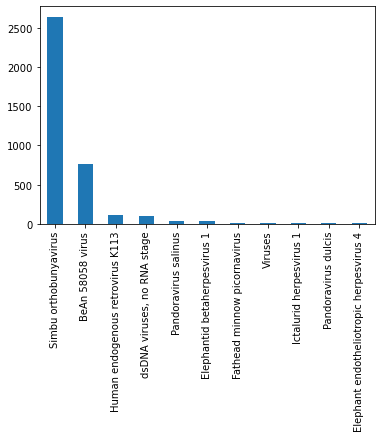

In [50]:
def return_last(string):
    return string.split(';')[-1]

viral_cancer = pd.read_csv('all_data/kraken_cancer_viruses.labels', sep = '\t', names = ['ind', 'name'])
viral_counts = viral_cancer.name.apply(return_last).value_counts()
viral_counts[viral_counts>7].plot(kind='bar')

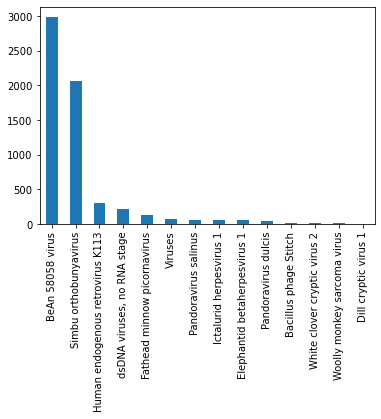

In [52]:
normal_cancer = pd.read_csv('all_data/kraken_normal_viruses.labels', sep = '\t', names = ['ind', 'name'])
normal_counts = normal_cancer.name.apply(return_last).value_counts()
normal_counts[normal_counts>7].plot(kind='bar')

In [57]:
merged_viruses = pd.DataFrame(dict(normal_counts = normal_counts, viral_counts = viral_counts))
merged_viruses.head()

,normal_counts,viral_counts
Abelson murine leukemia virus,NaN,2.0
Alphapapillomavirus 9,4.0,1.0
Apocheima cinerarium nucleopolyhedrovirus,1.0,NaN
Aspergillus foetidus dsRNA mycovirus,6.0,NaN
Bacillus phage Stitch,16.0,1.0


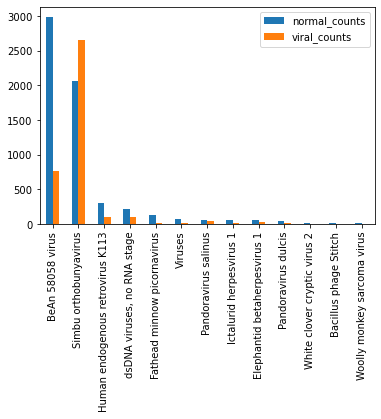

In [64]:
merged_viruses[(merged_viruses.normal_counts>10) |  (merged_viruses.viral_counts>10)].sort_values(by = ['normal_counts', 'viral_counts'], ascending = False).plot(kind='bar')